Decision Tree Accuracy (Train): 0.98
Decision Tree Accuracy (Test): 0.98
XGBoost Accuracy (Train): 1.00
XGBoost Accuracy (Test): 0.94
Decision Tree Metrics:
{'Train RMSE': 399887.34582948755, 'Test RMSE': 396749.19830312073, 'Train MAE': 109284.48597678248, 'Test MAE': 144276.3718623313, 'Train R^2': 0.9813334508723598, 'Test R^2': 0.9806005551724287}

XGBoost Metrics:
{'Train RMSE': 21320.450407025157, 'Test RMSE': 669048.3140462211, 'Train MAE': 10523.420050032808, 'Test MAE': 155971.218914042, 'Train R^2': 0.9999469518661499, 'Test R^2': 0.9448339343070984}


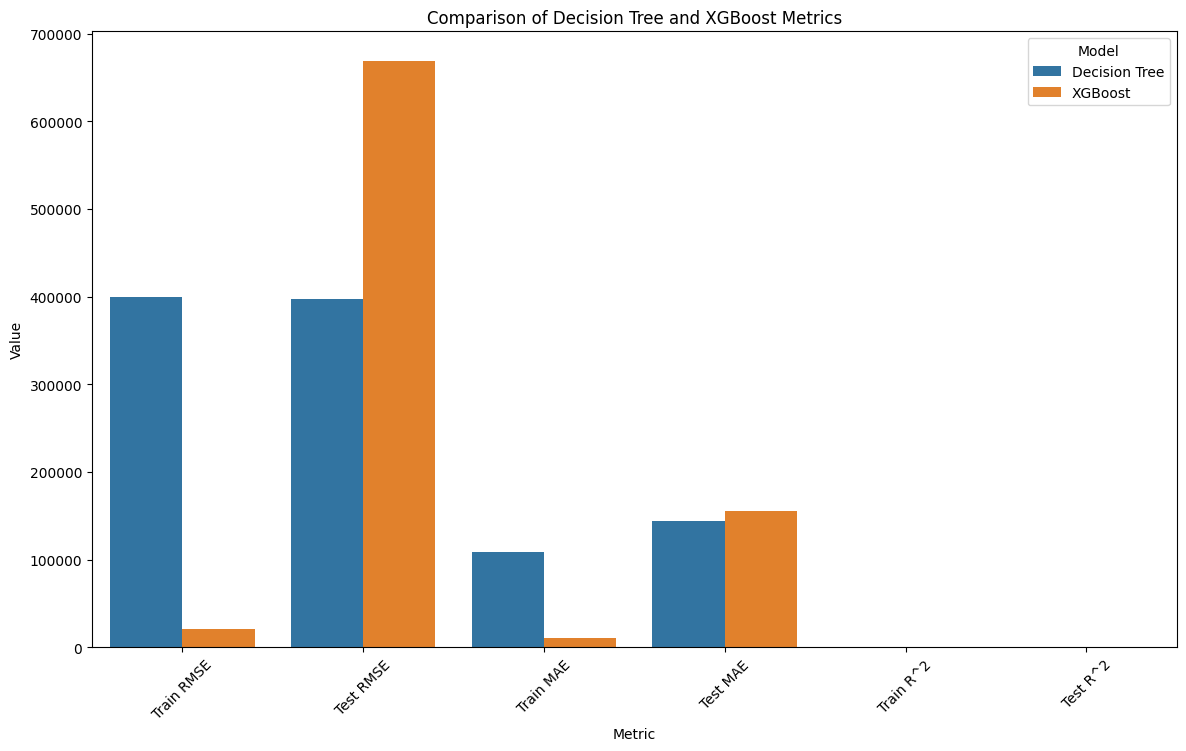

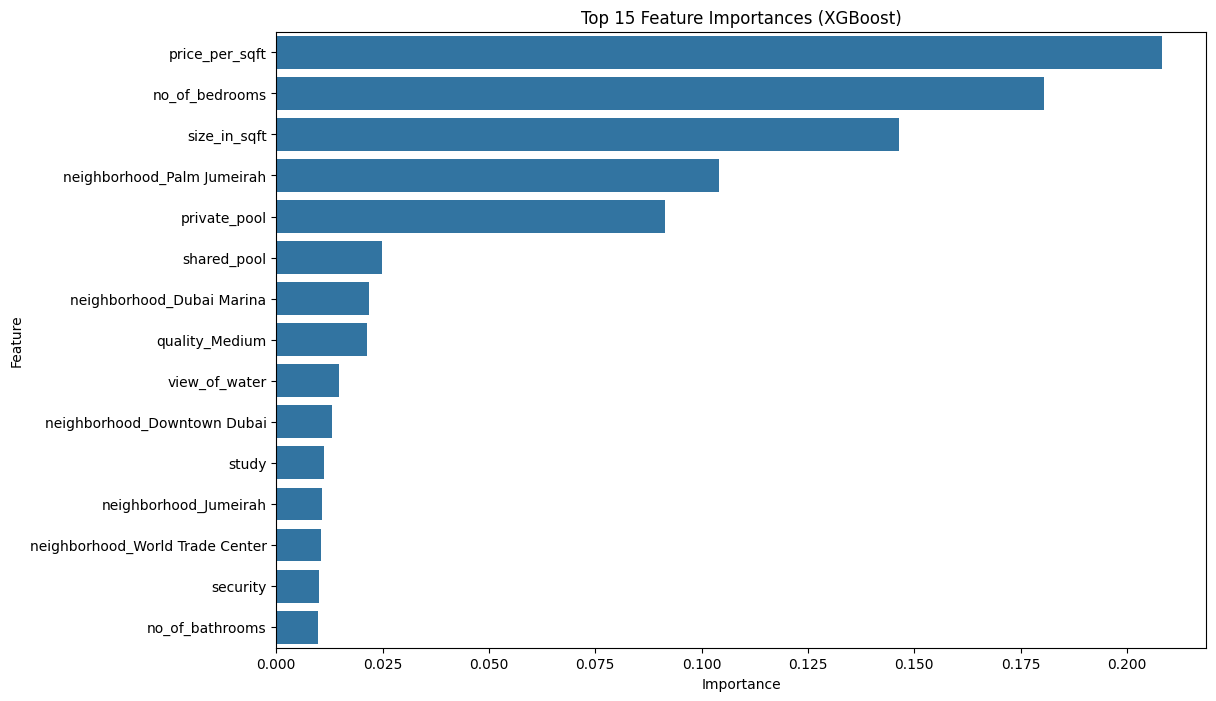

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

# Load the dataset
file_path = 'properties_data.csv'
data = pd.read_csv(file_path)

# Selecting relevant features for regression and converting categorical features to dummy variables
data_encoded = pd.get_dummies(data, columns=['neighborhood', 'quality'], drop_first=True)

# Separating features (X) and target variable (price)
X = data_encoded.drop(columns=['id', 'price'])
y = data_encoded['price']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model
dt_model = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt_model.fit(X_train, y_train)

dt_y_pred_train = dt_model.predict(X_train)
dt_y_pred_test = dt_model.predict(X_test)

dt_metrics = {
    'Train RMSE': np.sqrt(mean_squared_error(y_train, dt_y_pred_train)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, dt_y_pred_test)),
    'Train MAE': mean_absolute_error(y_train, dt_y_pred_train),
    'Test MAE': mean_absolute_error(y_test, dt_y_pred_test),
    'Train R^2': r2_score(y_train, dt_y_pred_train),
    'Test R^2': r2_score(y_test, dt_y_pred_test)
}

# Calculate Decision Tree Accuracy
dt_accuracy_train = dt_metrics['Train R^2']
dt_accuracy_test = dt_metrics['Test R^2']
print(f"Decision Tree Accuracy (Train): {dt_accuracy_train:.2f}")
print(f"Decision Tree Accuracy (Test): {dt_accuracy_test:.2f}")

# XGBoost Model
xgb_model = XGBRegressor(
    n_estimators=100,         # Number of trees (estimators)
    max_depth=10,             # Maximum depth of each tree
    learning_rate=0.1,        # Learning rate (shrinkage)
    subsample=0.8,            # Subsample ratio of the training instances
    colsample_bytree=0.8,     # Subsample ratio of columns when constructing each tree
    random_state=42           # Ensures reproducibility
)

xgb_model.fit(X_train, y_train)

xgb_y_pred_train = xgb_model.predict(X_train)
xgb_y_pred_test = xgb_model.predict(X_test)

xgb_metrics = {
    'Train RMSE': np.sqrt(mean_squared_error(y_train, xgb_y_pred_train)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, xgb_y_pred_test)),
    'Train MAE': mean_absolute_error(y_train, xgb_y_pred_train),
    'Test MAE': mean_absolute_error(y_test, xgb_y_pred_test),
    'Train R^2': r2_score(y_train, xgb_y_pred_train),
    'Test R^2': r2_score(y_test, xgb_y_pred_test)
}

# Calculate XGBoost Accuracy
xgb_accuracy_train = xgb_metrics['Train R^2']
xgb_accuracy_test = xgb_metrics['Test R^2']
print(f"XGBoost Accuracy (Train): {xgb_accuracy_train:.2f}")
print(f"XGBoost Accuracy (Test): {xgb_accuracy_test:.2f}")

# Print metrics for both models
print("Decision Tree Metrics:")
print(dt_metrics)
print("\nXGBoost Metrics:")
print(xgb_metrics)

# Comparison Plot
metrics_comparison = pd.DataFrame({
    'Metric': ['Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE', 'Train R^2', 'Test R^2'],
    'Decision Tree': list(dt_metrics.values()),
    'XGBoost': list(xgb_metrics.values())
})

metrics_comparison_melted = metrics_comparison.melt(id_vars='Metric', var_name='Model', value_name='Value')

plt.figure(figsize=(14, 8))
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_comparison_melted)
plt.title('Comparison of Decision Tree and XGBoost Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.legend(title='Model')
plt.xticks(rotation=45)
plt.show()

# Visualizing feature importance for XGBoost
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
plt.title('Top 15 Feature Importances (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
